Análise sócio econômica do estado de São Paulo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
dados_enem = pd.read_csv('/content/drive/MyDrive/Sistemas para Internet/Tópicos em Computação/Curso_Python/arquivo_enem.csv', sep=";", encoding='iso-8859-1')

Tratamento e Análise dos Dados

In [ ]:
#Preview da tabela
dados_enem.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_SEXO,Q001,Q002,Q003,Q004,Q005,Q006,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,"1,90001E+11",Santa Isabel,SP,M,H,E,C,B,7,C,...,A,A,A,C,A,A,D,A,B,B
1,"1,90001E+11",Pinhalzinho,SP,M,D,D,B,B,4,C,...,A,A,A,B,A,A,C,A,B,A
2,"1,90001E+11",São Paulo,SP,F,E,E,F,B,6,D,...,A,A,A,A,A,A,C,A,A,A
3,"1,90001E+11",São Bernardo do Campo,SP,M,B,B,B,B,4,C,...,B,A,B,B,B,A,B,B,A,B
4,"1,90001E+11",São Joaquim da Barra,SP,M,B,B,A,A,3,C,...,B,A,A,A,A,A,C,B,B,B


In [ ]:
#Número total de linhas e colunas
dados_enem.shape

(813772, 29)

In [ ]:
dados_enem.drop(columns=['SG_UF_RESIDENCIA'], inplace=True)

In [ ]:
dados_enem.drop(columns=['Q001', 'Q002', 'Q003', 'Q004', 'Q013', 'Q018', 'Q020'], inplace=True)

In [ ]:
#Verificar se tem dados nulos
dados_enem.isnull().sum()

,0
Q005,0
Q006,0
Q007,0
Q008,0
Q009,0
Q010,0
Q011,0
Q012,0
Q014,0
Q015,0


In [ ]:
#Quantidade de participação dos homens e mulheres
dados_enem['TP_SEXO'].value_counts()

,count
TP_SEXO,
F,480164
M,333608


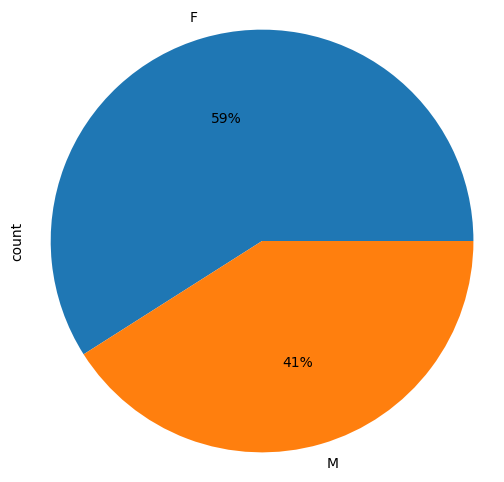

In [ ]:
dados_enem.TP_SEXO.value_counts().plot(figsize=(6,6), kind='pie', autopct='%1.f%%')
plt.axis('equal');

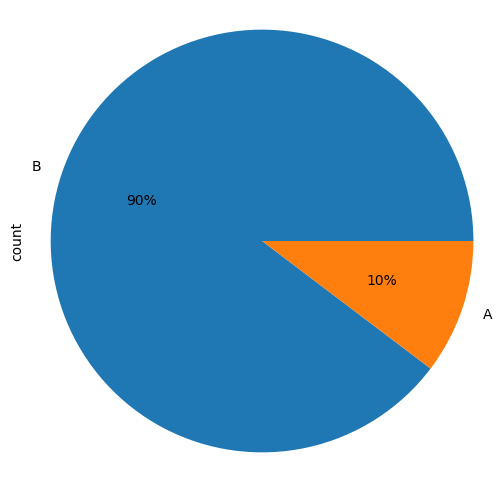

In [ ]:
dados_enem.Q025.value_counts().plot(figsize=(6,6), kind='pie', autopct='%1.f%%')
plt.axis('equal');

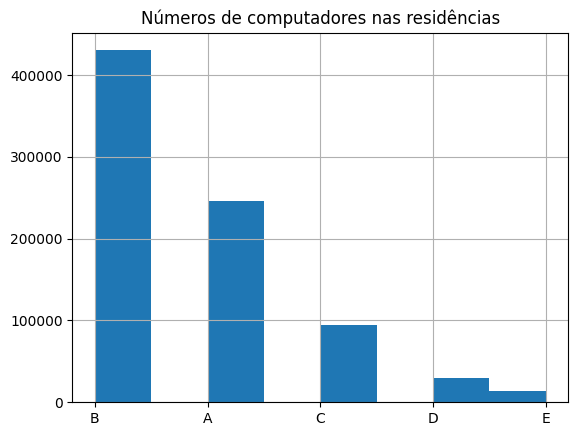

In [ ]:
dados_enem.Q024.hist(bins=8)
plt.title('Números de computadores nas residências')
plt.show()

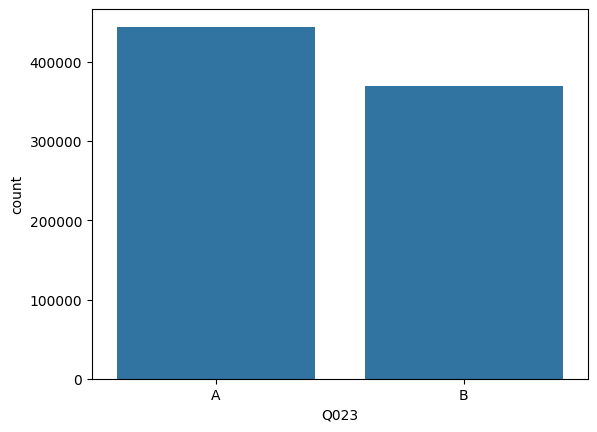

In [ ]:
sns.countplot(x='Q023', data=dados_enem);

In [ ]:
dados_enem.drop(columns=['NU_INSCRICAO', 'NO_MUNICIPIO_RESIDENCIA', 'TP_SEXO'], inplace=True)

KeyError: "['NU_INSCRICAO', 'NO_MUNICIPIO_RESIDENCIA', 'TP_SEXO'] not found in axis"

In [ ]:
dados_enem.to_csv('/content/drive/MyDrive/Sistemas para Internet/Tópicos em Computação/Curso_Python/dados_tratados_enem.csv', encoding='iso-8859-1', index=False)

Transformar as variáveis qualitativas em quantitativas.

In [ ]:
dados_tratados = pd.read_csv('/content/drive/MyDrive/Sistemas para Internet/Tópicos em Computação/Curso_Python/dados_tratados_enem.csv', sep=",", encoding='iso-8859-1')

In [ ]:
dados_tratados.head()

,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q014,Q015,Q016,Q017,Q019,Q021,Q022,Q023,Q024,Q025
0,7,C,A,B,C,A,A,B,B,A,A,A,C,A,D,A,B,B
1,4,C,A,B,D,A,B,B,A,A,A,A,B,A,C,A,B,A
2,6,D,A,B,C,A,A,B,A,A,A,A,A,A,C,A,A,A
3,4,C,A,C,D,B,B,B,B,B,B,A,B,A,B,B,A,B
4,3,C,A,B,C,A,B,B,A,A,B,A,A,A,C,B,B,B


In [ ]:
dados_tratados.Q025.replace(['A','B'], [0,1], inplace=True)

In [ ]:
dados_tratados.Q024.replace(['A','B','C','D','E'], [0,1,2,3,4], inplace=True)

Redes Neurais Artificiais

In [ ]:
dados_tratados2 = pd.read_csv('/content/drive/MyDrive/Sistemas para Internet/Tópicos em Computação/Curso_Python/dados_tratados_enem.csv', sep=",", encoding='iso-8859-1')

In [ ]:
dados_tratados2.head()

,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q014,Q015,Q016,Q017,Q019,Q021,Q022,Q023,Q024,Q025
0,7,C,A,B,C,A,A,B,B,A,A,A,C,A,D,A,B,B
1,4,C,A,B,D,A,B,B,A,A,A,A,B,A,C,A,B,A
2,6,D,A,B,C,A,A,B,A,A,A,A,A,A,C,A,A,A
3,4,C,A,C,D,B,B,B,B,B,B,A,B,A,B,B,A,B
4,3,C,A,B,C,A,B,B,A,A,B,A,A,A,C,B,B,B


In [ ]:
previsores = dados_tratados2.iloc[:, 0:17].values

In [ ]:
classe = dados_tratados2.iloc[:, 17].values

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
ColumnTransformer?

# ColumnTransformer?

Parâmetros Columntransform



*   name: nome do dado a transformar
*   transformer: tipo de estimador (OneHotEncoder)
*   columns: colunas que serão transformadas
*   remainder: o que acontecerá com restante das colunas não relacionados 1-**Drop** é padrão, 2-passthrough = manter
*   sparse_threshold = parâmetro de classificação de matrizes esparsas padrão 0.3
*   p_jobs = número de trabalho a serem executados em paralelo
*   transformer_weights = definição do peso de transformação
*   verbose = False, True = mostra a execução








In [ ]:
transformacao_previsores = ColumnTransformer([('transformacao', OneHotEncoder(), [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])])

In [ ]:
previsores = transformacao_previsores.fit_transform(previsores).toarray()

In [ ]:
previsores

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
previsores.shape

(813772, 105)

In [ ]:
transformacao_classe = LabelEncoder()

In [ ]:
classe = transformacao_classe.fit_transform(classe)

In [ ]:
classe

array([1, 0, 0, ..., 0, 1, 1])

Algoritmo com base de treinamento e teste no scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
previsores_teste, previsores_treinamento, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.15, random_state=0)

In [ ]:
previsores_teste.shape

(691706, 105)

In [ ]:
classe_treinamento.shape

(691706,)

In [ ]:
classe_teste.shape

(122066,)

In [ ]:
previsores_treinamento.shape

(122066, 105)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
classificador = MLPClassifier(hidden_layer_sizes=(53,53), activation='relu', solver='adam', random_state=12, max_iter=500, tol=0.001, verbose=True)

In [ ]:
classificador.fit(previsores_treinamento, classe_teste)

Iteration 1, loss = 0.24315508
Iteration 2, loss = 0.22612053
Iteration 3, loss = 0.22524198
Iteration 4, loss = 0.22458514
Iteration 5, loss = 0.22411821
Iteration 6, loss = 0.22345854
Iteration 7, loss = 0.22274500
Iteration 8, loss = 0.22210661
Iteration 9, loss = 0.22161722
Iteration 10, loss = 0.22103463
Iteration 11, loss = 0.22055722
Iteration 12, loss = 0.21997090
Iteration 13, loss = 0.21948658
Training loss did not improve more than tol=0.001000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(53, 53), max_iter=500, random_state=12,
              tol=0.001, verbose=True)

In [ ]:
previsores = classificador.predict(previsores_teste)

In [ ]:
previsores

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
acuracia = accuracy_score(classe_treinamento, previsores)

In [ ]:
acuracia

0.9053745377371311

In [ ]:
matriz = confusion_matrix(classe_treinamento, previsores)

In [ ]:
matriz

array([[ 17229,  54119],
       [ 11334, 609024]])